## *Maryam Mounad - Muhammad Humza Arain - Mahak Nadeem*

# Exercise 1 - Logistic Regression - Theory (6 points)


**1.** Considering the equation of the logistic regression:

a. What are X and Y in this case? (1 point)

X (input variables): Years of smoking and age of the patient.

Y (target variable): Binary indicator of whether the patient has lung cancer (1) or not (0).

b. What do the outputs of the logistic model, and the logistic function represent in general? What are their ranges? (1 point)

# Logistic Model:
Output: logit (log-odds) value, computed as a linear combination of the input features

Range:(−∞,+∞)

# Logistic Function:
Output: Probability 

Range: (0,1)

**2.** Consider the following dataset on breast cancer. The target variable ‘tumor’
defines whether it is a benign (0) tumor or a malignant (1) tumor.
We want to assess the statistical significance of the predictor mean radius. Let us say
we have two different models to estimate the target variable:
• Model 1 has all nine predictor variables.
• Model 2 has eight predictor variables, all but the ‘mean radius’.

a. What is our null hypothesis here? Which statistical test would you apply to
compare the fit of the two models? (1 point)

- Null Hypothesis (H₀): The predictor variable "mean radius" has no significant effect on the target variable (tumor).

- Statistical Test: Likelihood Ratio Test (LRT) or ANOVA (F-test) comparing Model 1 (with all predictors) and Model 2 (excluding mean radius).

b. Which result of the statistical test would let you conclude whether the
predictor variable ‘mean radius’ is statistically significant or not? (1 point)

If the p-value from the statistical test is less than the significance level (e.g., 0.05), we reject the null hypothesis, concluding that ‘mean radius’ is statistically significant in predicting the tumor.
However, if p=0.0, we cannot reject the null hypothesis, meaning that the mean radius does not have a signifacnt effect on the tuour malignancy.


**3.** Considering this example housing dataset. The input variables (MedInc,
HouseAge, … etc.) as well as the target variable (MedHouseVal) are shown.
Which assumptions must be fulfilled to apply logistic regression? Are they
fulfilled in this example? (2 points)

Logistic regression requires a binary/categorical target, independent samples, linear class seperation , p should be < n and low multicollinearity among predictors.
 
In this example:

The target variable MedHouseVal is continuous, not binary → violates the most fundamental requirement. 

There are no binary classes , so linear class separation is not possible. -> violation

There are 8 predictors and 5 observations -> violation


Since, logistic regression assumptions are not fulfilled in this example, the method is not approprate for this dataset. 


# Exercise 2 - ANOVA F-test and Hierarchical Clustering (12 points)

**1.**

**a)-**
- the assumptions of the ANOVA F-test:
  - data is normally distributed
  - These distributions have the same variance.
  - independence of observations

**b)-**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [ ]:
#Load data 
expr = pd.read_csv("leukemia.csv", index_col=0) 
classes = pd.read_csv("golub.cl.csv", index_col=0, header=0) 
y = classes['x'].values #Split classes into two groups

In [42]:
gene_names = expr.index.values
p_vals = []
for gene in gene_names:
    grp0 = expr.loc[gene, y == 0]
    grp1 = expr.loc[gene, y == 1]
    f_stat, p = f_oneway(grp0, grp1)
    p_vals.append(p)

#DataFrame of results
results = pd.DataFrame({'gene': gene_names, 'p_value': p_vals})
results = results.sort_values('p_value')
results.head()

,gene,p_value
428,M63138_at,2.366804e-08
684,U50136_rna1_at,2.519519e-08
1348,M31523_at,2.713676e-08
346,M16038_at,4.802350e-08
481,M92287_at,6.046048e-08


**c)-**

In [41]:
top100 = results.head(100)['gene'].values
expr_top100 = expr.loc[top100]
expr_top100.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
gene_name,,,,,,,,,,,,,,,,,,,,,
M63138_at,0.98318,1.39165,1.46391,0.86954,0.92723,1.49335,1.71610,1.34453,1.38809,1.47143,...,1.93217,2.39638,2.16979,2.40208,1.38017,2.33999,2.33015,2.60321,2.31917,1.50779
U50136_rna1_at,0.77407,0.69785,0.85670,0.69715,0.63730,0.76063,0.83617,1.19658,0.45291,1.05127,...,1.92742,1.70779,1.76434,1.44715,0.77720,1.56749,1.74375,1.65866,1.43275,1.51216
M31523_at,0.92234,0.54933,0.10862,1.21964,0.96513,0.69793,0.72464,1.32339,0.79254,0.15163,...,-0.13281,-0.54233,-0.06494,0.25829,-0.87699,-0.33927,0.08948,-1.20703,-0.79439,-0.40721
M16038_at,-0.26342,0.22701,-1.39460,0.62578,0.35737,-0.19119,-0.27313,-0.55534,-0.62212,-0.88031,...,1.30495,1.41996,0.82319,1.49690,1.50992,1.23706,0.70736,1.34766,1.38402,0.54227
M92287_at,2.10892,1.52405,1.96403,2.33597,1.85111,1.99391,2.06597,1.81649,2.17622,1.80861,...,1.45014,0.42904,0.82667,0.63637,1.02250,0.12758,-0.74333,0.73784,0.49470,1.12058


**2.**

**a)-**

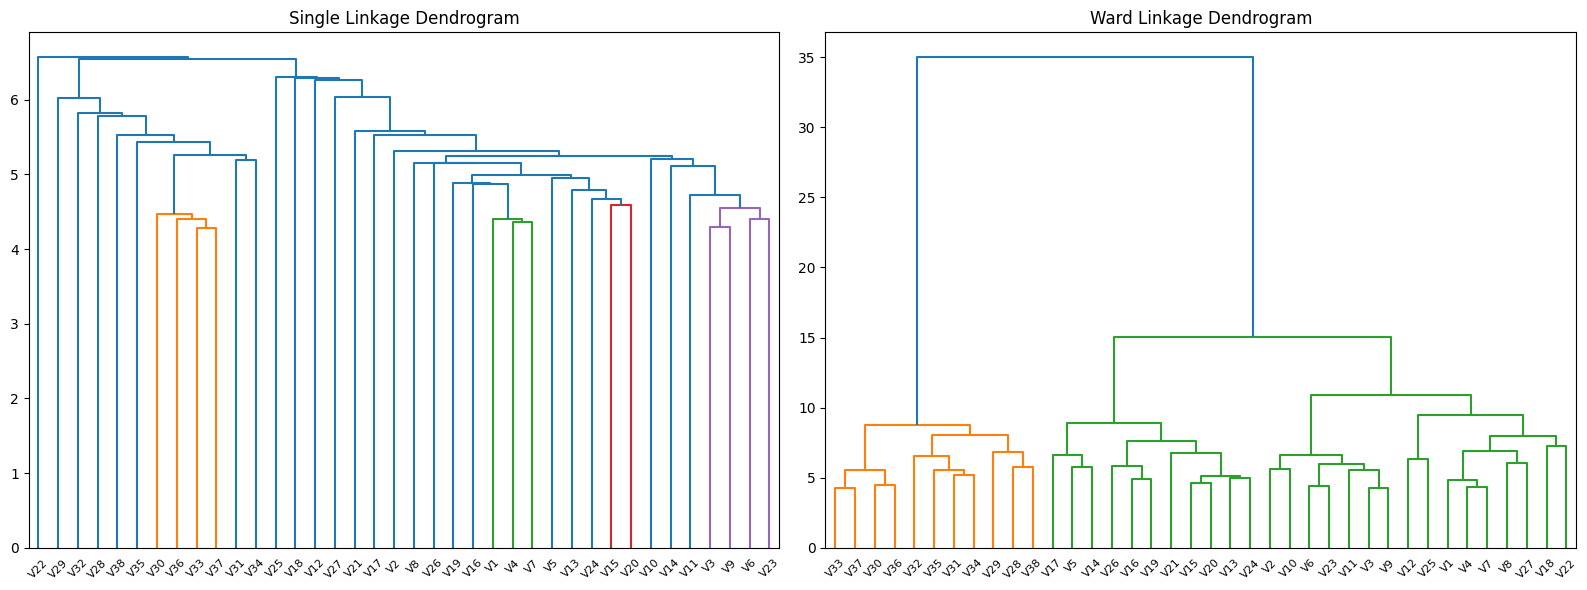

In [28]:
data_for_clust = expr_top100.T  #Transpose : samples x genes

Z_single = linkage(data_for_clust, method='single')
Z_ward = linkage(data_for_clust, method='ward')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
dendrogram(Z_single, labels=data_for_clust.index, ax=ax1)
ax1.set_title('Single Linkage Dendrogram')
dendrogram(Z_ward, labels=data_for_clust.index, ax=ax2)
ax2.set_title('Ward Linkage Dendrogram')
plt.tight_layout()
plt.show()

**b)-** 
- Ward linkage yielded more balanced clusters with clearer separation. while Single linkage formed elongated poorly-separated clusters. So, I recommend the ward linkage method.

**c)-**

In [29]:
coph_single, _ = cophenet(Z_single, pdist(data_for_clust))
coph_ward, _ = cophenet(Z_ward, pdist(data_for_clust))
print(f"Cophenetic correlation (single): {coph_single:.4f}")
print(f"Cophenetic correlation (ward): {coph_ward:.4f}")

Cophenetic correlation (single): 0.7723
Cophenetic correlation (ward): 0.8520


**d)-**

In [30]:
#whichever it has the highest cophenetic corr
better = 'single' if coph_single > coph_ward else 'ward'
print(f"Better by cophenetic correlation: {better} linkage")

Better by cophenetic correlation: ward linkage


**3)-**

In [31]:
from sklearn.cluster._agglomerative import AgglomerativeClustering

ac_single: AgglomerativeClustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit(data_for_clust)
ac_ward: AgglomerativeClustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data_for_clust)
print("Cluster labels (single):", ac_single.labels_)
print("Cluster labels (ward):", ac_ward.labels_)

Cluster labels (single): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
Cluster labels (ward): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1]


# Exercise 3 - PCA (7 Points)
Load the dataset (golub.csv). Start again with all genes and generate a feature matrix
(transposed leukemia dataset) and a class label variable (golub.cl.csv).
1. Perform a PCA on the feature matrix and answer the following:


# a. 
Create a combined plot displaying both the scree plot and the cumulative
explained variance to illustrate how many principal components are required
to explain at least 95% of the total variance?
(2 points)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap

In [11]:

#Load and transpose: rows = samples, cols = genes
X = pd.read_csv('golub.csv', index_col=0).T
# Treat row 0 as header, and use column 0 as the index
df = pd.read_csv(
    'golub.cl.csv',
    header=0,        # first row has column name ("x")
    index_col=0      # first column ("1","2",…) becomes the index
)
labels = df.squeeze()


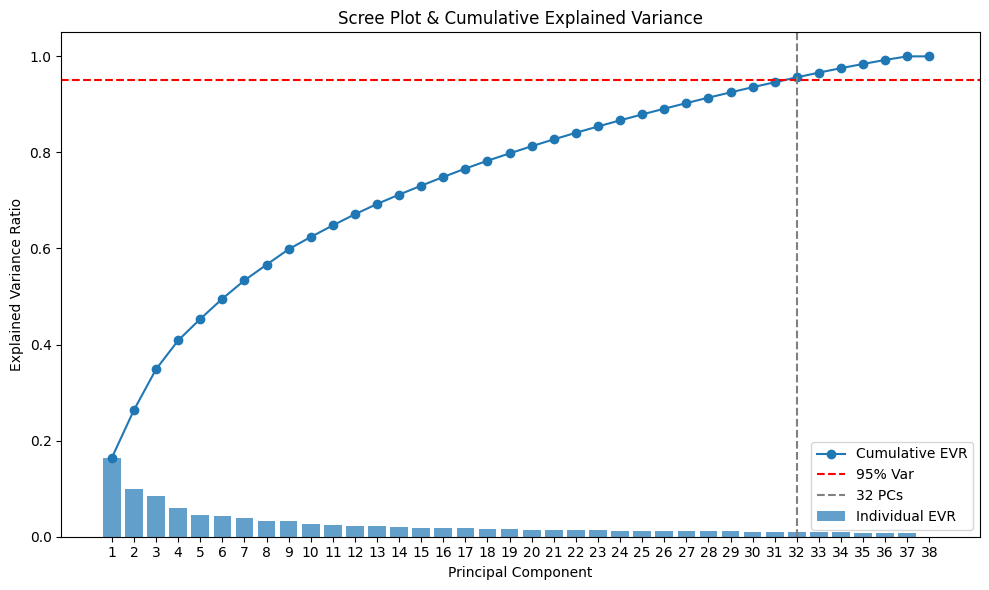

PCs needed for ≥95% variance: 32


In [12]:

pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find how many PCs to hit 95%
n95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot scree + cumulative
plt.figure(figsize=(10,6))
pcs = np.arange(1, len(explained_variance)+1)

# scree
plt.bar(pcs, explained_variance, alpha=0.7, label='Individual EVR')
# cumulative
plt.plot(pcs, cumulative_variance, '-o', label='Cumulative EVR')

# 95% markers
plt.axhline(0.95, color='red', linestyle='--', label='95% Var')
plt.axvline(n95, color='grey', linestyle='--', label=f'{n95} PCs')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.xticks(pcs)
plt.legend()
plt.tight_layout()
plt.show()

print(f'PCs needed for ≥95% variance: {n95}')


# b
Make a scatterplot of the projections on the first two PC‘s. Color the plot
according to the class labels

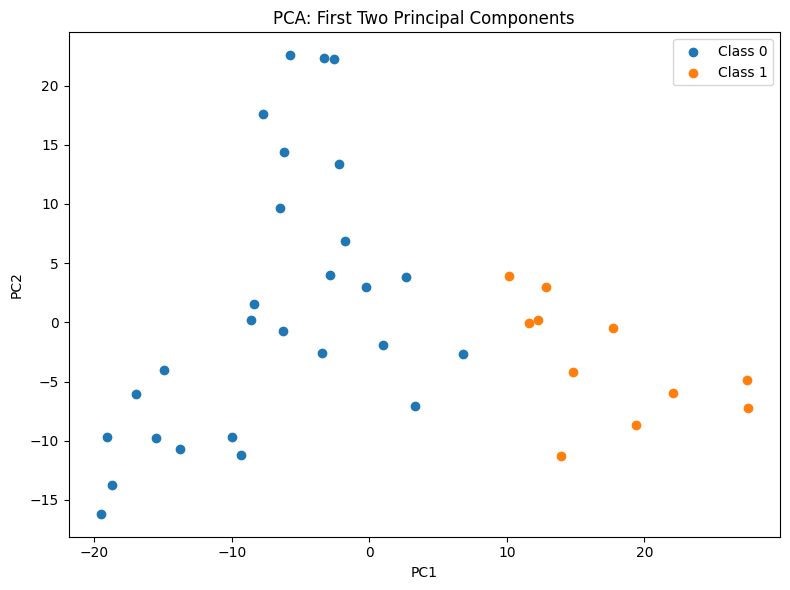

In [13]:
ca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
for cls in np.unique(labels):
    mask = labels == cls
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Class {cls}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA: First Two Principal Components')
ax.legend()
plt.tight_layout()
plt.show()

# c
Inform yourself about the UMAP, obtain the projection plot and compare
with PCA results

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


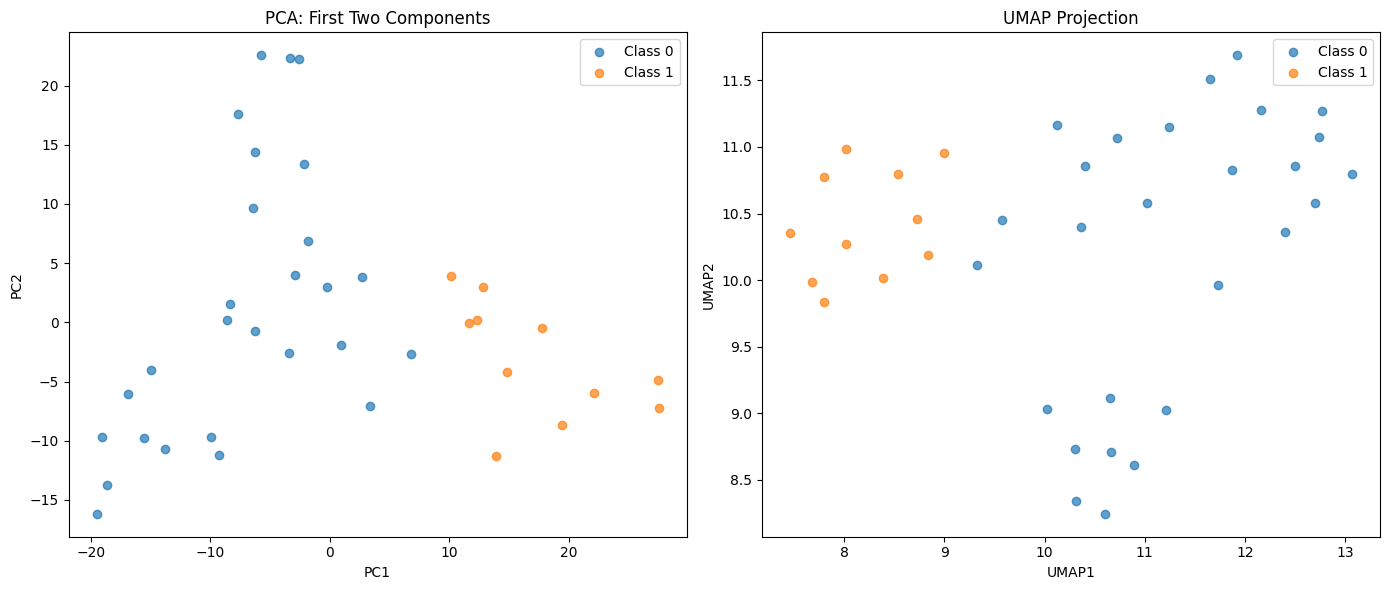

In [14]:
pca = PCA(n_components=2, random_state=42)

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

# 5. Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# PCA plot
ax1.set_title('PCA: First Two Components')

for cls in np.unique(labels):
    mask = labels == cls
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1],
                label=f'Class {cls}', alpha=0.7)
ax1.set_xlabel('PC1'); ax1.set_ylabel('PC2')
ax1.legend()

# UMAP plot
ax2.set_title('UMAP Projection')
for cls in np.unique(labels):
    mask = labels == cls
    ax2.scatter(X_umap[mask, 0], X_umap[mask, 1],
                label=f'Class {cls}', alpha=0.7)
ax2.set_xlabel('UMAP1'); ax2.set_ylabel('UMAP2')
ax2.legend()

plt.tight_layout()
plt.show()

# d



**Based on the scatterplot, answer the following questions (2 points)**


**i. Given the different plots, which of the previous techniques do you think would be the better choice?**

 There are only two true classes, but UMAP is splitting the samples into three islands, it’s likely over-segregating (picking up substructure or noise). PCA is the more appropriate choice 

**ii. Do you think n=2 components are a good choice? Why?**


Yes, plotting the first two PCs is a standard way to get a quick, interpretable 2D view of your data but two PCs typically capture only a fraction of the total variance